# Prova 2:Exercicio 1

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab


<img src="controle.png" width=400 alt="Problema">

$ y_p = - n_1 \cdot \frac{s + n_2}{s^2 + n_3 \cdot s + n_4} \cdot u_p $,

Sendo NUSP= 11800910, $n_1 = 9$, $n_2 = 8$, $n_3 = 1$ e $n_4 = 0$

Logo: 
$ y_p = - 9 \cdot \frac{s + 8}{s^2 + 1 \cdot s} \cdot u_p $,

com modelo de referência: $y_m = \frac{4}{s + 5} \cdot r$


In [3]:
n1 = 9
n2 = 8
n3 = 1
n4 = 0

In [4]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')

ftp = -n1 * (s + n2) / (s**2 + n3*s + n4)

ftm = 4 / (s + 5)

ftp

TransferFunction(array([ -9., -72.]), array([1., 1., 0.]))

In [5]:
# Parâmetros de simulação
N = 50
dt = 0.01  # Taxa de amostragem
T = np.arange(0, N + dt, dt)

# r = np.ones(len(T))  # referência
r = 0.1*np.cos(np.pi*T/3)


len(T)

5001

/home/tommaselli/.local/lib/python3.8/site-packages/control/timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


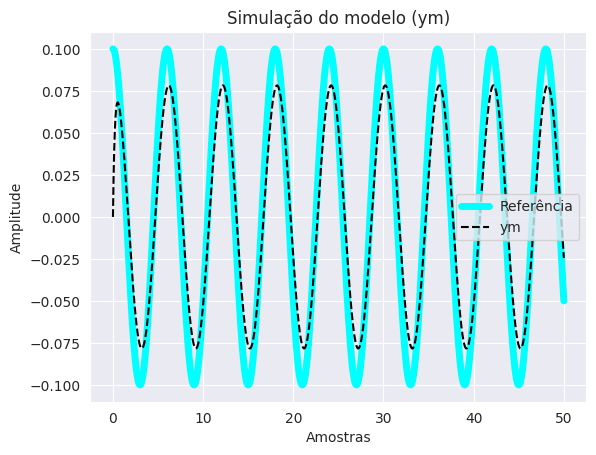

In [6]:
# Simulação dos modelos
ym, T, _ = matlab.lsim(ftm, r, T)

# Plotagem dos resultados juntos
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], r[:corte], label='Referência', color='cyan', linewidth=5)
plt.plot(T[:corte], ym[:corte], label='ym', color='black', linestyle='--', linewidth=1.5)



plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Simulação do modelo (ym)')

plt.legend()
plt.show()

$(1 - \theta _1 ^* \cdot \frac{1}{s+2}) \cdot (\frac{-9 \cdot s - 72}{s^2 + s }) = c_0 ^* \cdot r + (\theta _3 ^* + \theta _2 ^* \cdot \frac{1}{s+2})\cdot y_p$

$\begin{bmatrix}    0 & 0 & 0 & -9 \\    4 & 0 & -36 & -135 \\    4 & -36 & -360 & -594 \\    0 & -288 & -576 & -720\end{bmatrix}\begin{bmatrix}    \theta_1^* \\    \theta_2^* \\    \theta_3^* \\    c_0 ^* \end{bmatrix} = \begin{bmatrix}     4 \\     12 \\     8 \\    0 \end{bmatrix}$

In [7]:
import numpy as np

# Define the coefficients matrix A and the constants vector b
A = np.array([[0, 0, 0, -9], [4, 0, -36, -135], [4, -36, -360, -594], [0, -288, -576, -720]])
b = np.array([4, 12, 8, 0])

# Solve the linear system of equations
theta1, theta2, theta3, c0 = np.linalg.solve(A, b)

# Print the solution
print(f'Soluções: {theta1:.3f}, {theta2:.3f}, {theta3:.3f}, {c0:.3f}')


Soluções: -6.000, -0.222, 0.667, -0.444


$u_p = \frac{1}{s + 2} \cdot \theta_1 ^* \cdot u_p + \frac{1}{s + 2} \cdot \theta_2 ^* \cdot y_p + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r$

$u_p \cdot (1 - \frac{1}{s + 2} \cdot \theta_1 ^*) =  \frac{1}{s + 2} \cdot \theta_2 ^* \cdot y_p + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r $

Pela expressão original, tomaremos que $y_p = \xi \cdot u_p$

$u_p \cdot (1 - \frac{1}{s + 2} \cdot \theta_1 ^*) =  \frac{1}{s + 2} \cdot \theta_2 ^* \cdot y_p + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r $

In [8]:
s = matlab.tf('s')

A = (s + 8) / (s + 2) 
B = - 9 * (s + 8) / (s**2 + 1 * s)
C = (6*s + 10) / (s + 2)
D = -4/9

ftx = (D) / (A - (C/B))

ftx

TransferFunction(array([  4.,  48., 144., 128.]), array([   -6,   -37,  -204,  -884, -1152]))

---

$u_p = \frac{1}{s + 2} \cdot \theta_1 ^* \cdot u_p + \frac{1}{s + 2} \cdot \theta_2 ^* \cdot y_p + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r$

$u_p = \frac{1}{s + 2} \cdot (-6) \cdot u_p + \frac{1}{s + 2} \cdot (-2)  \cdot y_p + (6) \cdot y_p + (-0.444) \cdot r$

$u_p \cdot (1 + \frac{6}{s + 2}) = y_p \cdot (\frac{-2}{s + 2} + 6) - 0.444 \cdot r $

$(\frac{1}{- 9 \cdot \frac{s + 8}{s^2 + 1 \cdot s}} \cdot y_p) \cdot (\frac{s + 8}{s + 2}) = y_p \cdot (\frac{-2}{s + 2} + 6) - 0.444 \cdot r $

Sendo $\alpha = - 9 \cdot \frac{s + 8}{s^2 + 1 \cdot s}$, $\beta = \frac{s + 8}{s + 2}$, $\gamma = \frac{-2}{s + 2} + 6$ e $\phi = -0.444$

$\frac{\beta}{\alpha} \cdot y_p = y_p \cdot \gamma + \phi \cdot r $

$(\frac{\beta}{\alpha} - \gamma) \cdot y_p = \phi \cdot r $

$y_p = (\frac{\phi}{\frac{\beta}{\alpha} - \gamma}) \cdot r $


In [9]:
alpha = -9 * (s + 8) / (s**2 + s)
beta = (s+8)/(s+2)
gamma = 6 + (-2)/(s+2)
phi = -4/9

ftx2 = phi / ((beta/alpha) - gamma)

ftx2

TransferFunction(array([  4.,  48., 144., 128.]), array([   1,   65,  656, 1780, 1440]))

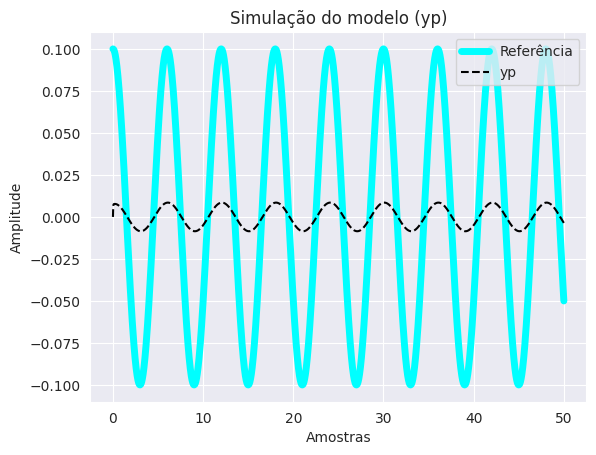

In [10]:
yp, T, _ = matlab.lsim(ftx2, r, T)

# Plotagem dos resultados juntos
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], r[:corte], label='Referência', color='cyan', linewidth=5)
plt.plot(T[:corte], yp[:corte], label='yp', color='black', linestyle='--', linewidth=1.5)



plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Simulação do modelo (yp)')

plt.legend()
plt.show()

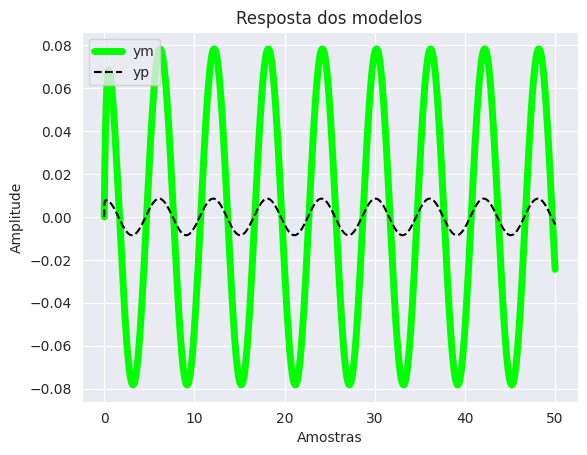

In [11]:
# Gráfico das respostas de yp e ym com entrada de referência r
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], ym[:corte], label='ym', color='lime', linewidth=5)
plt.plot(T[:corte], yp[:corte], label='yp', color='black', linestyle='--', linewidth=1.5)

plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Resposta dos modelos')

plt.legend()

plt.show()
